In [1]:
import warnings

from src import utils

import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
from datetime import date, datetime
import numpy as np
#import geopandas as geo
import subprocess

from IPython.display import display, Markdown

In [2]:
in_name = 'CombinedModels-FileStructureColumns-pop50-block_group-2022-09-04.csv'
out_bg = pd.read_csv(utils.DATA['model-outputs'] / in_name)
out_bg

,GEOID,state,NFIRS_start,NFIRS_end,years_fires_reported,total_fires_reported,max_fires_1k,median_fires_1k,total_fires_reported_sev,max_fires_1k_sev,...,snap_past_12_mo,single_unit_home,multi_unit_home,mobile_home,boat_van_rv_home,spanish_speaking,state_id,state_rank,county_id,county_rank
0,#_010010201001,AL,2011,2017,2,2.0,1.342282,1.342282,2.0,1.342282,...,0.183099,0.820423,0.024648,0.154930,0.000000,0.102113,#_01,2806.0,#_01001,24.0
1,#_010010201002,AL,2011,2017,4,6.0,1.581028,1.185771,2.0,0.790514,...,0.096491,0.925054,0.000000,0.074946,0.000000,0.046053,#_01,3159.0,#_01001,29.0
2,#_010010202001,AL,2011,2017,5,7.0,3.141361,1.047120,2.0,1.047120,...,0.303109,0.768844,0.201005,0.030151,0.000000,0.000000,#_01,1587.0,#_01001,12.0
3,#_010010202002,AL,2011,2017,5,10.0,3.777148,0.944287,3.0,1.888574,...,0.172566,0.821138,0.168699,0.010163,0.000000,0.011062,#_01,2357.0,#_01001,19.0
4,#_010010203001,AL,2011,2017,6,10.0,1.269036,0.634518,5.0,0.423012,...,0.082524,0.995112,0.000000,0.004888,0.000000,0.037621,#_01,2313.0,#_01001,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216022,#_560459511001,WY,2011,2017,1,2.0,1.372684,1.372684,2.0,1.372684,...,0.054252,0.711035,0.053470,0.228669,0.006826,0.000000,#_56,2.0,#_56045,1.0
216023,#_560459511002,WY,2011,2017,1,1.0,0.632111,0.632111,0.0,NaN,...,0.010724,0.706250,0.000000,0.293750,0.000000,0.009383,#_56,23.0,#_56045,2.0
216024,#_560459513001,WY,2011,2017,4,5.0,1.737619,0.868810,0.0,NaN,...,0.172084,0.709910,0.054054,0.236036,0.000000,0.000000,#_56,215.0,#_56045,3.0
216025,#_560459513002,WY,2011,2017,2,2.0,0.970874,0.970874,0.0,NaN,...,0.075404,0.720325,0.160976,0.118699,0.000000,0.000000,#_56,247.0,#_56045,4.0


In [3]:
#in_name = 'CombinedModels-FileStructureColumns-pop50-tract-2022-09-04.csv'
#out_tract = pd.read_csv(utils.DATA['model-outputs'] / in_name)
#out_tract.index = out_tract['GEOID']
#out_tract = out_tract.drop(columns = ['GEOID', 'geography'])
#out_tract
#out_tract.to_csv(utils.DATA['model-outputs'] / in_name)

In [4]:
in_name = 'CombinedModels-FileStructureColumns-pop50-tract-2022-09-04.csv'
out_tract = pd.read_csv(utils.DATA['model-outputs'] / in_name)
out_tract

,GEOID,state,NFIRS_start,NFIRS_end,years_fires_reported,total_fires_reported,max_fires_1k,median_fires_1k,total_fires_reported_sev,max_fires_1k_sev,...,snap_past_12_mo,single_unit_home,multi_unit_home,mobile_home,boat_van_rv_home,spanish_speaking,state_id,state_rank,county_id,county_rank
0,#_01001020100,AL,2011,2017,5,8.0,0.995025,0.995025,4.0,0.995025,...,0.128592,0.885486,0.009321,0.105193,0.000000,0.066831,#_01,982.0,#_01001,10.0
1,#_01001020200,AL,2011,2017,7,17.0,2.979146,0.993049,5.0,0.993049,...,0.234467,0.797753,0.183146,0.019101,0.000000,0.005817,#_01,696.0,#_01001,2.0
2,#_01001020300,AL,2011,2017,7,22.0,1.275510,1.275510,8.0,0.637755,...,0.111567,0.900141,0.096343,0.003516,0.000000,0.028360,#_01,851.0,#_01001,7.0
3,#_01001020400,AL,2011,2017,6,17.0,0.876616,0.767039,5.0,0.438308,...,0.034827,0.946181,0.053819,0.000000,0.000000,0.048244,#_01,935.0,#_01001,9.0
4,#_01001020500,AL,2011,2017,7,49.0,1.065891,0.678295,7.0,0.290698,...,0.117928,0.678928,0.321072,0.000000,0.000000,0.005857,#_01,1094.0,#_01001,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72137,#_56043000200,WY,2011,2017,2,2.0,0.327869,0.327869,0.0,NaN,...,0.091458,0.764368,0.063218,0.167385,0.005029,0.056990,#_56,81.0,#_56043,2.0
72138,#_56043000301,WY,2011,2017,5,10.0,1.202405,0.801603,3.0,0.801603,...,0.064153,0.831159,0.099002,0.069839,0.000000,0.105229,#_56,15.0,#_56043,1.0
72139,#_56043000302,WY,2011,2017,3,5.0,1.141118,0.380373,1.0,0.380373,...,0.087787,0.729391,0.160394,0.096774,0.013441,0.152151,#_56,105.0,#_56043,3.0
72140,#_56045951100,WY,2011,2017,2,3.0,0.658111,0.493583,2.0,0.658111,...,0.031593,0.708755,0.027993,0.259678,0.003574,0.004885,#_56,50.0,#_56045,2.0


In [5]:
#in_name = 'CombinedModels-FileStructureColumns-pop50-county-2022-09-04.csv'
#out_county = pd.read_csv(utils.DATA['model-outputs'] / in_name)
#out_county.index = out_county['GEOID']
#out_county = out_county.drop(columns = ['GEOID', 'geography'])
#out_county
#out_county.to_csv(utils.DATA['model-outputs'] / in_name)

In [6]:
in_name = 'CombinedModels-FileStructureColumns-pop50-county-2022-09-04.csv'
out_county = pd.read_csv(utils.DATA['model-outputs'] / in_name)
out_county

,GEOID,state,NFIRS_start,NFIRS_end,years_fires_reported,total_fires_reported,max_fires_1k,median_fires_1k,total_fires_reported_sev,max_fires_1k_sev,...,snap_past_12_mo,single_unit_home,multi_unit_home,mobile_home,boat_van_rv_home,spanish_speaking,state_id,state_rank,county_id,county_rank
0,#_01001,AL,2011,2017,7,168.0,0.567786,0.457892,38.0,0.164841,...,0.127977,0.728978,0.089284,0.180285,0.001453,0.022453,#_01,63.0,#_01001,1.0
1,#_01003,AL,2011,2017,7,758.0,0.737388,0.508544,133.0,0.122050,...,0.089366,0.630123,0.249631,0.119252,0.000995,0.044759,#_01,66.0,#_01003,1.0
2,#_01005,AL,2011,2017,7,53.0,0.761389,0.211497,15.0,0.338395,...,0.257016,0.576597,0.121674,0.299441,0.002288,0.050249,#_01,13.0,#_01005,1.0
3,#_01007,AL,2011,2017,5,23.0,0.388293,0.194146,5.0,0.097073,...,0.146243,0.643781,0.072113,0.284106,0.000000,0.014411,#_01,37.0,#_01007,1.0
4,#_01009,AL,2011,2017,7,208.0,0.928212,0.367782,51.0,0.315242,...,0.116018,0.731656,0.038784,0.229224,0.000335,0.057006,#_01,11.0,#_01009,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,#_56037,WY,2011,2017,6,115.0,0.543404,0.441516,32.0,0.226419,...,0.044100,0.616271,0.158779,0.224322,0.000628,0.093154,#_56,19.0,#_56037,1.0
3138,#_56039,WY,2011,2017,5,50.0,0.887942,0.488368,11.0,0.177588,...,0.014235,0.702453,0.260909,0.030319,0.006320,0.124490,#_56,8.0,#_56039,1.0
3139,#_56041,WY,2011,2017,6,42.0,0.677704,0.314648,3.0,0.048407,...,0.083410,0.612454,0.133782,0.246122,0.007641,0.081690,#_56,22.0,#_56041,1.0
3140,#_56043,WY,2011,2017,6,17.0,0.611696,0.367017,4.0,0.244678,...,0.081943,0.776961,0.103910,0.113356,0.005773,0.102321,#_56,5.0,#_56043,1.0


In [10]:
in_name = 'TrainedOnBG-tract-2022-09-04.csv'
after_tract = pd.read_csv(utils.DATA['model-outputs'] / in_name)
after_tract

,GEOID,state,NFIRS_start,NFIRS_end,years_fires_reported,total_fires_reported,max_fires_1k,median_fires_1k,total_fires_reported_sev,max_fires_1k_sev,...,snap_past_12_mo,single_unit_home,multi_unit_home,mobile_home,boat_van_rv_home,spanish_speaking,state_id,state_rank,county_id,county_rank
0,#_01001020100,AL,2011,2017,3.258706,8.0,1.492537,1.243781,4.0,0.995025,...,0.128592,0.886272,0.009136,0.104592,0.000000,0.066831,#_01,1036.0,#_01001,11.0
1,#_01001020200,AL,2011,2017,5.000000,17.0,3.475670,0.993049,5.0,1.489573,...,0.234467,0.796341,0.184018,0.019641,0.000000,0.005817,#_01,678.0,#_01001,6.0
2,#_01001020300,AL,2011,2017,6.000000,22.0,1.913265,1.116071,8.0,0.637755,...,0.111567,0.911790,0.084526,0.003684,0.000000,0.028360,#_01,704.0,#_01001,7.0
3,#_01001020400,AL,2011,2017,3.926803,17.0,1.534078,0.876616,5.0,0.657462,...,0.034827,0.943291,0.056709,0.000000,0.000000,0.048244,#_01,663.0,#_01001,5.0
4,#_01001020500,AL,2011,2017,6.370640,49.0,1.162791,0.823643,7.0,0.290698,...,0.117928,0.676567,0.323433,0.000000,0.000000,0.005857,#_01,1154.0,#_01001,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72137,#_56043000200,WY,2011,2017,0.774754,2.0,0.655738,0.655738,0.0,0.000000,...,0.091458,0.753102,0.074001,0.166853,0.006044,0.056990,#_56,27.0,#_56043,1.0
72138,#_56043000301,WY,2011,2017,1.981964,10.0,1.603206,1.002004,3.0,0.801603,...,0.064153,0.843318,0.092888,0.063794,0.000000,0.105229,#_56,76.0,#_56043,3.0
72139,#_56043000302,WY,2011,2017,1.561050,5.0,1.521491,1.141118,1.0,0.380373,...,0.087787,0.730794,0.159841,0.096028,0.013337,0.152151,#_56,67.0,#_56043,2.0
72140,#_56045951100,WY,2011,2017,1.000000,3.0,0.987167,0.987167,2.0,0.658111,...,0.031593,0.708544,0.025635,0.262548,0.003273,0.004885,#_56,2.0,#_56045,1.0


In [8]:
in_name = 'TrainedOnBG-county-2022-09-04.csv'
after_county = pd.read_csv(utils.DATA['model-outputs'] / in_name)
after_county

,GEOID,state,NFIRS_start,NFIRS_end,years_fires_reported,total_fires_reported,max_fires_1k,median_fires_1k,total_fires_reported_sev,max_fires_1k_sev,...,snap_past_12_mo,single_unit_home,multi_unit_home,mobile_home,boat_van_rv_home,spanish_speaking,state_id,state_rank,county_id,county_rank
0,#_01001,AL,2011,2017,3.431023,168.0,1.172204,0.750943,38.0,0.384629,...,0.127977,0.736557,0.085260,0.176695,0.001488,0.022453,#_01,62.0,#_01001,1.0
1,#_01003,AL,2011,2017,4.452360,758.0,1.418836,0.762815,133.0,0.381408,...,0.089366,0.706353,0.157369,0.135164,0.001114,0.044759,#_01,66.0,#_01003,1.0
2,#_01005,AL,2011,2017,1.290216,53.0,1.142084,0.634491,15.0,0.465293,...,0.257016,0.581526,0.122152,0.293386,0.002936,0.050249,#_01,14.0,#_01005,1.0
3,#_01007,AL,2011,2017,1.644760,23.0,0.679513,0.558171,5.0,0.242683,...,0.146243,0.642416,0.068359,0.289225,0.000000,0.014411,#_01,59.0,#_01007,1.0
4,#_01009,AL,2011,2017,2.539624,208.0,1.611237,0.963239,51.0,0.472863,...,0.116018,0.733611,0.039209,0.226844,0.000335,0.057006,#_01,49.0,#_01009,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,#_56037,WY,2011,2017,2.296880,115.0,1.403795,0.905674,32.0,0.475479,...,0.044100,0.632603,0.157313,0.209544,0.000540,0.093154,#_56,14.0,#_56037,1.0
3138,#_56039,WY,2011,2017,2.502575,50.0,1.243118,0.887942,11.0,0.310780,...,0.014235,0.700322,0.263987,0.031158,0.004533,0.124490,#_56,9.0,#_56039,1.0
3139,#_56041,WY,2011,2017,2.337496,42.0,1.113370,0.871333,3.0,0.145222,...,0.083410,0.624190,0.131420,0.236145,0.008245,0.081690,#_56,10.0,#_56041,1.0
3140,#_56043,WY,2011,2017,1.396134,17.0,1.223391,0.917543,4.0,0.367017,...,0.081943,0.773465,0.107375,0.112616,0.006545,0.102321,#_56,11.0,#_56043,1.0


In [12]:
after_tract.columns == out_tract.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [13]:
out_county.columns == after_county.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [18]:
out_county.columns

Index(['GEOID', 'state', 'NFIRS_start', 'NFIRS_end', 'years_fires_reported',
       'total_fires_reported', 'max_fires_1k', 'median_fires_1k',
       'total_fires_reported_sev', 'max_fires_1k_sev', 'median_fires_1k_sev',
       'fire_propensity_risk_score', 'fire_severity_risk_score',
       'fire_risk_score', 'recorded_home_visits', 'smoke_detector_risk_frac',
       'smoke_detector_risk_score', 'SVI_Theme_1', 'CombinedRiskScore',
       'did_not_work_past_12_mo', 'house_pct_live_alone', 'pct_alt_heat',
       'house_yr_pct_before_1960', 'inc_pct_poverty',
       'race_pct_black_or_amind', 'tot_population', 'house_tot_occ_cnt',
       'inc_pcincome', 'inc_hhmean', 'race_pct_white', 'race_pct_whitenh',
       'race_pct_whiteh', 'race_pct_nwhitenh', 'race_pct_hisp',
       'race_pct_black', 'race_pct_amind', 'race_pct_asian', 'race_pct_napi',
       'race_pct_other', 'race_pct_two+', 'age_pct_under25', 'age_pct_over65',
       'disability_pct', 'snap_past_12_mo', 'single_unit_home',
   

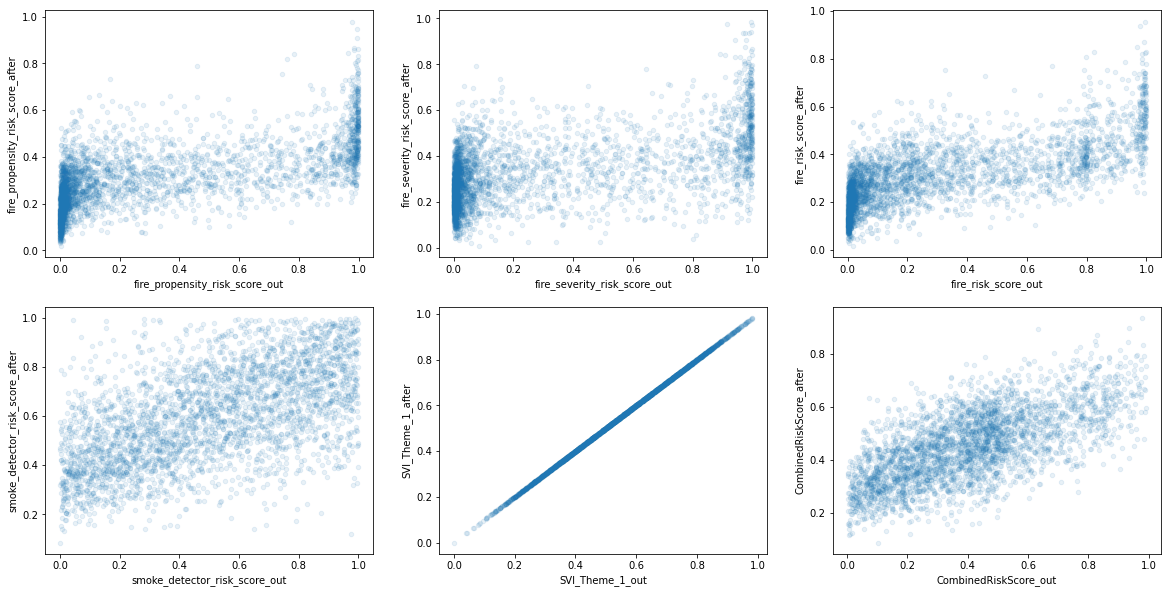

In [20]:
county = out_county.merge(after_county, how = 'left', left_on = 'GEOID', right_on = 'GEOID', suffixes = ('_out', '_after'))
fig, ax = plt.subplots(ncols=3, nrows = 2, figsize=(20,10))
axe = ax.ravel()
scores = ['fire_propensity_risk_score', 'fire_severity_risk_score', 'fire_risk_score', 
        'smoke_detector_risk_score', 'SVI_Theme_1', 'CombinedRiskScore',]
c = 0
for i in range(len(scores)):
    county.plot.scatter(x = scores[i]+'_out', y = scores[i]+'_after', ax=axe[c], alpha = 0.1)
    c += 1


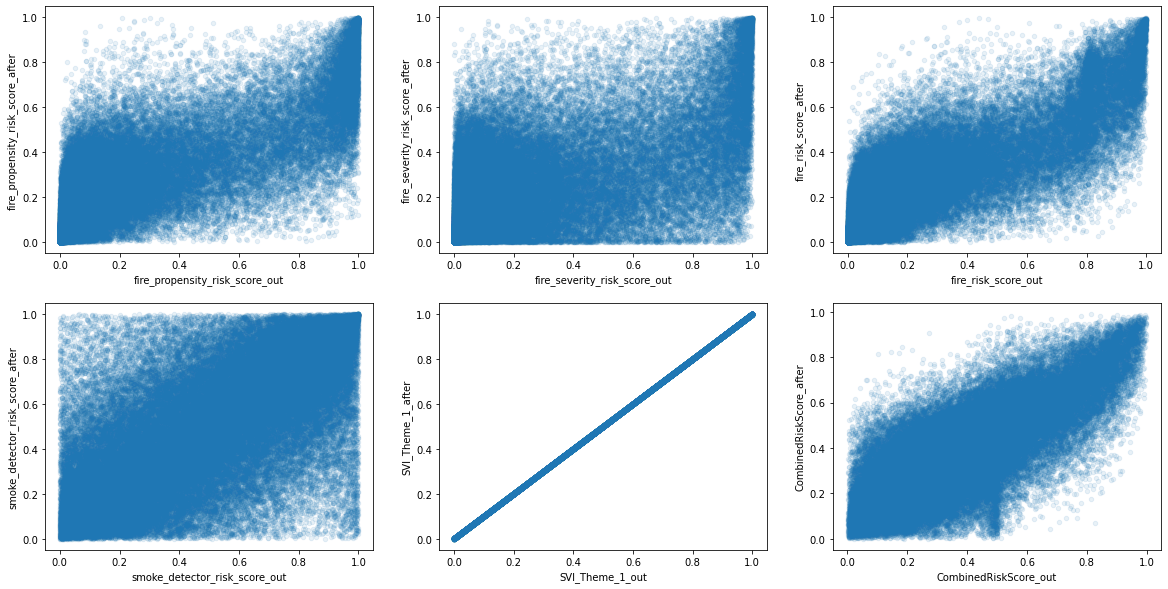

In [21]:
tract = out_tract.merge(after_tract, how = 'left', left_on = 'GEOID', right_on = 'GEOID', suffixes = ('_out', '_after'))
fig, ax = plt.subplots(ncols=3, nrows = 2, figsize=(20,10))
axe = ax.ravel()
scores = ['fire_propensity_risk_score', 'fire_severity_risk_score', 'fire_risk_score', 
        'smoke_detector_risk_score', 'SVI_Theme_1', 'CombinedRiskScore',]
c = 0
for i in range(len(scores)):
    tract.plot.scatter(x = scores[i]+'_out', y = scores[i]+'_after', ax=axe[c], alpha = 0.1)
    c += 1